slope: 0.9837254841077041
y_intercept: 0.17134520403336456


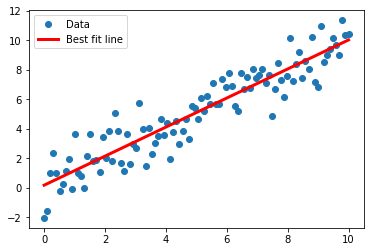

In [2]:
# Linear Regression: Decomposition Method
#----------------------------------
#
# This function shows how to use Tensorflow to
# solve linear regression via the matrix inverse.
#
# Given Ax=b, and a Cholesky decomposition such that
#  A = L*L' then we can get solve for x via
# 1) L*y=t(A)*b
# 2) L'*x=y

import matplotlib.pyplot as plt
import numpy as np
import tensorflow as tf
from tensorflow.python.framework import ops
ops.reset_default_graph()

# Create graph
sess = tf.Session()

# Create the data
x_vals = np.linspace(0, 10, 100)
y_vals = x_vals + np.random.normal(0, 1, 100)

# Create design matrix
x_vals_column = np.transpose(np.matrix(x_vals))
ones_column = np.transpose(np.matrix(np.repeat(1, 100)))
A = np.column_stack((x_vals_column, ones_column))

# Create b matrix
b = np.transpose(np.matrix(y_vals))

# Create tensors
A_tensor = tf.constant(A)
b_tensor = tf.constant(b)

# Find Cholesky Decomposition
tA_A = tf.matmul(tf.transpose(A_tensor), A_tensor)
L = tf.cholesky(tA_A)

# Solve L*y=t(A)*b
tA_b = tf.matmul(tf.transpose(A_tensor), b)
sol1 = tf.matrix_solve(L, tA_b)

# Solve L' * y = sol1
sol2 = tf.matrix_solve(tf.transpose(L), sol1)

solution_eval = sess.run(sol2)

# Extract coefficients
slope = solution_eval[0][0]
y_intercept = solution_eval[1][0]

print('slope: ' + str(slope))
print('y_intercept: ' + str(y_intercept))

# Get best fit line
best_fit = []
for i in x_vals:
  best_fit.append(slope*i+y_intercept)

# Plot the results
plt.plot(x_vals, y_vals, 'o', label='Data')
plt.plot(x_vals, best_fit, 'r-', label='Best fit line', linewidth=3)
plt.legend(loc='upper left')
plt.show()